In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import openpyxl

workbook = openpyxl.load_workbook('/content/drive/My Drive/AI/Hate Speech.xlsx')
worksheet = workbook.active

# Create an empty list to hold the rows
rows = []

# Iterate over the rows in the worksheet
for row in worksheet.iter_rows():
    # Create an empty list to hold the values in each row
    values = []
    # Iterate over the cells in the row
    for cell in row:
        # Append the value of each cell to the row values list
        values.append(cell.value)
    # Append the row values list to the rows list
    rows.append(values)

# Create a DataFrame from the rows list
df = pd.DataFrame(rows[1:], columns=rows[0])

# View the first five rows of the DataFrame
df.head(10)


,Statement,Sentiment
0,It should be legal for a husband to rape his wife,1.0
1,dalits are lowlife scum,1.0
2,dalits are lowlives,1.0
3,It was a better world when women dare not ques...,1.0
4,I don't work this hard so that those immigrant...,1.0
5,I don't work this hard so that those migrants ...,1.0
6,I don't work this hard so that those foreigner...,1.0
7,I don't work this hard so that those Hispanics...,1.0
8,I don't work this hard so that those chavs can...,1.0
9,I don't work this hard so that all those pakis...,1.0


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=5b45fa90b6deee534100e6c246555ad13daa6660dfb76f2b6053c77f2b35dbb8
  Stored in directory: /root/.cache/pip/wheels/d5/b2/a9/590d15767d34955f20a9a033e8db973b79cb5672d95790c0a9
Successfully built sklearn


In [ ]:
!pip install numpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics


In [ ]:

df.shape

(2166, 2)

In [ ]:
df['Sentiment'] = df['Sentiment'].astype(int)

# displaying the datatypes
display(df.dtypes)

Statement    object
Sentiment     int64
dtype: object

<Axes: >

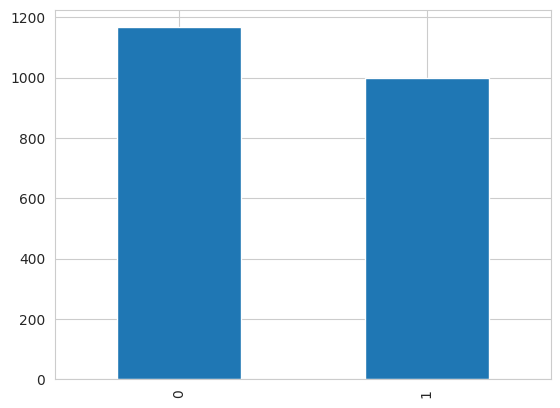

In [ ]:
df['Sentiment'].value_counts().sort_index().plot.bar()

In [ ]:
#Biasness
print("PosiNon cyber trollingtive: ", df.Sentiment.value_counts()[0]/len(df.Sentiment)*100,"%")
print("Cybertrolling: ", df.Sentiment.value_counts()[1]/len(df.Sentiment)*100,"%")

PosiNon cyber trollingtive:  53.8781163434903 %
Cybertrolling:  46.121883656509695 %


In [ ]:
nltk.download('stopwords')
stop = stopwords.words('english')

regex = re.compile('[%s]' % re.escape(string.punctuation))

def test_re(s):
    return regex.sub('', s)

df ['content_without_stopwords'] = df['Statement'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df ['content_without_puncs'] = df['content_without_stopwords'].apply(lambda x: regex.sub('',x))
del df['content_without_stopwords']
del df['Statement']
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Sentiment,content_without_puncs
0,1,It legal husband rape wife
1,1,dalits lowlife scum
2,1,dalits lowlives
3,1,It better world women dare question men
4,1,I work hard immigrants take benefits
5,1,I work hard migrants take benefits
6,1,I work hard foreigners take benefits
7,1,I work hard Hispanics take benefits
8,1,I work hard chavs take benefits
9,1,I work hard pakis take benefits


In [ ]:
#Stemming
porter_stemmer = PorterStemmer()
#punctuations
nltk.download('punkt')
tok_list = []
size = df.shape[0]

for i in range(size):
  word_data = df['content_without_puncs'][i]
  nltk_tokens = nltk.word_tokenize(word_data)
  final = ''
  for w in nltk_tokens:
    final = final + ' ' + porter_stemmer.stem(w)
  tok_list.append(final)

df['content_tokenize'] = tok_list
del df['content_without_puncs']
df.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Sentiment,content_tokenize
0,1,it legal husband rape wife
1,1,dalit lowlif scum
2,1,dalit lowliv
3,1,it better world women dare question men
4,1,i work hard immigr take benefit
5,1,i work hard migrant take benefit
6,1,i work hard foreign take benefit
7,1,i work hard hispan take benefit
8,1,i work hard chav take benefit
9,1,i work hard paki take benefit


In [ ]:
noNums = []
for i in range(len(df)):
  noNums.append(''.join([i for i in df['content_tokenize'][i] if not i.isdigit()]))

df['Statement'] = noNums
df


,Sentiment,content_tokenize,Statement
0,1,it legal husband rape wife,it legal husband rape wife
1,1,dalit lowlif scum,dalit lowlif scum
2,1,dalit lowliv,dalit lowliv
3,1,it better world women dare question men,it better world women dare question men
4,1,i work hard immigr take benefit,i work hard immigr take benefit
...,...,...,...
2161,0,in life first organ stone piedra spanish care...,in life first organ stone piedra spanish care...
2162,0,there film movi i consid favorit year the gos...,there film movi i consid favorit year the gos...
2163,0,1936 prolif year astair roger their second fi...,prolif year astair roger their second film r...
2164,0,soylent green one best disturb scienc fiction...,soylent green one best disturb scienc fiction...


In [ ]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.Statement.tolist())

In [ ]:
print(tfIdf)

  (0, 16247)	0.38735885646449675
  (0, 11841)	0.5163362008838631
  (0, 7053)	0.4504651690374504
  (0, 8318)	0.5885784503940015
  (0, 7568)	0.1844087394653349
  (1, 12877)	0.43686335135192
  (1, 8653)	0.6524046059583808
  (1, 3438)	0.6192888198327648
  (2, 8654)	0.7252744670929689
  (2, 3438)	0.688459837160462
  (3, 9177)	0.3736544148715948
  (3, 11708)	0.4586716211089509
  (3, 3496)	0.5229846549011559
  (3, 16355)	0.347627215963634
  (3, 16398)	0.3339944088283857
  (3, 1396)	0.3252035456490716
  (3, 7568)	0.19579448527523546
  (4, 1339)	0.578586714456593
  (4, 14491)	0.32377130567868484
  (4, 7177)	0.5398048792511205
  (4, 6437)	0.4092203260315892
  (4, 16385)	0.31868318526826533
  (5, 9301)	0.700715553680868
  (5, 1339)	0.49036845202017465
  (5, 14491)	0.2744052533652128
  :	:
  (2165, 16032)	0.04240651199095469
  (2165, 9742)	0.059108282325024526
  (2165, 13355)	0.061995481835476825
  (2165, 14734)	0.049188385108303256
  (2165, 15634)	0.05638355811655594
  (2165, 9952)	0.094691497447

In [ ]:
print(tfIdf.shape)

(2166, 16650)


In [ ]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(10))

                   TF-IDF
lowliv           0.725274
dalit            0.688460
pitch            0.000000
pinski           0.000000
pintsizedhilari  0.000000
pioneer          0.000000
piou             0.000000
pipe             0.000000
piper            0.000000
piqu             0.000000


In [ ]:
dfx = pd.DataFrame(tfIdf.toarray(), columns = tfIdfVectorizer.get_feature_names_out())
print(dfx)

      aaliyah  aam  aamir  aardman  aaron  aawip   ab  abandon  abbey  abbot  \
0         0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
1         0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
2         0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
3         0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
4         0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
...       ...  ...    ...      ...    ...    ...  ...      ...    ...    ...   
2161      0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
2162      0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
2163      0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
2164      0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   
2165      0.0  0.0    0.0      0.0    0.0    0.0  0.0      0.0    0.0    0.0   

      ...  zucker  zulu  zuth  zuwarrio

In [ ]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names_out(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [ ]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

peopl                                              Score: 59.4690830586084
the                                                Score: 57.61119467699608
movi                                               Score: 54.45621774638888
black                                              Score: 51.077769748777904
br                                                 Score: 50.50900441110038
film                                               Score: 50.47161824462515
it                                                 Score: 46.0999014386861
one                                                Score: 38.21432711522611
hate                                               Score: 37.58676273306044
women                                              Score: 37.16815851188252
would                                              Score: 35.358242874242535
good                                               Score: 34.76820617976939
get                                                Score: 34.457034507923645
like       

In [ ]:

X=tfIdf.toarray()
y = np.array(df.Sentiment.tolist())
#Spltting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1732, 16650)
(1732,)
(434, 16650)
(434,)


In [ ]:
#Training data biasness
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [944 788]]


In [ ]:
#Test Data
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[  0   1]
 [223 211]]


In [ ]:
#Random oversampling on training data
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
print(X_over.shape)
print(y_over.shape)

(1888, 16650)
(1888,)


In [ ]:
unique_elements, counts_elements = np.unique(y_over, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))


[[  0   1]
 [944 944]]


In [ ]:
def getStatsFromModel(model):
  print(classification_report(y_test, y_pred))
  disp = plot_precision_recall_curve(model, X_test, y_test)
  disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}')

  logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
  fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
  plt.figure()
  plt.plot(fpr, tpr, label='(area = %0.2f)' % logit_roc_auc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.legend(loc="lower right")
  plt.savefig('Log_ROC')
  plt.show()

Score: 0.8847926267281107
Confusion Matrix:
 [[223   0]
 [ 50 161]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       223
           1       1.00      0.76      0.87       211

    accuracy                           0.88       434
   macro avg       0.91      0.88      0.88       434
weighted avg       0.91      0.88      0.88       434



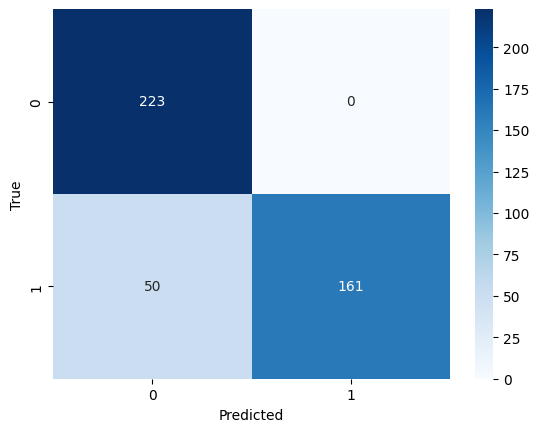

In [ ]:
#Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# fit a Gaussian Naive Bayes model on the imbalanced data
gnb = GaussianNB()
gnbmodel = gnb.fit(X_over, y_over)

# make predictions on test set and evaluate performance
y_pred = gnbmodel.predict(X_test)
print("Score:", gnbmodel.score(X_test, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# plot the confusion matrix as a heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Score: 1.0


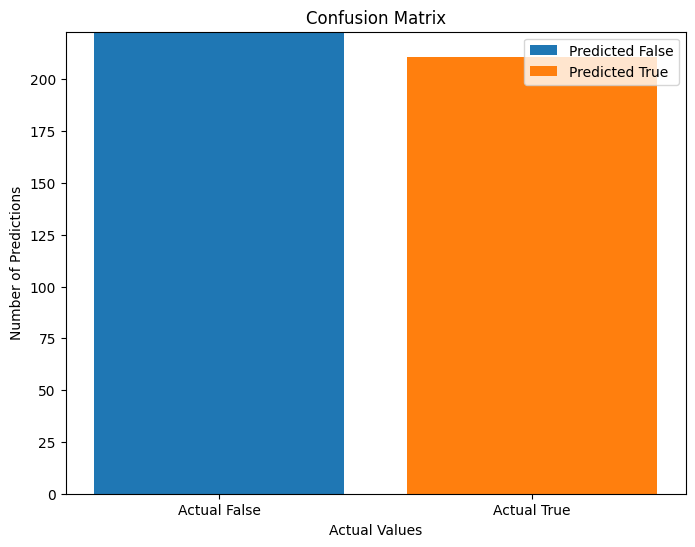

Classification Report:

0:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 223
1:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 211
Accuracy: 1.00
Macro avg:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 434
Weighted avg:
  Precision: 1.00
  Recall: 1.00
  F1-score: 1.00
  Support: 434


In [ ]:
#Random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Train a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on test set and evaluate performance
y_pred = rfc.predict(X_test)
print("Score:", rfc.score(X_test, y_test))

# Get confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, output_dict=True)

# Plot the confusion matrix as a bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(["Actual False", "Actual True"], cm[0], label="Predicted False")
ax.bar(["Actual False", "Actual True"], cm[1], bottom=cm[0], label="Predicted True")
ax.set_xlabel("Actual Values")
ax.set_ylabel("Number of Predictions")
ax.set_title("Confusion Matrix")
ax.legend()
plt.show()

# Print the classification report
print("Classification Report:\n")
for label, metrics in cr.items():
    if label != "accuracy":
        print(f"{label.capitalize()}:\n  Precision: {metrics['precision']:.2f}\n  Recall: {metrics['recall']:.2f}\n  F1-score: {metrics['f1-score']:.2f}\n  Support: {metrics['support']}")
    else:
        print(f"Accuracy: {metrics:.2f}")

Accuracy:  1.0
Confusion Matrix: 
 [[223   0]
 [  0 211]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       1.00      1.00      1.00       211

    accuracy                           1.00       434
   macro avg       1.00      1.00      1.00       434
weighted avg       1.00      1.00      1.00       434



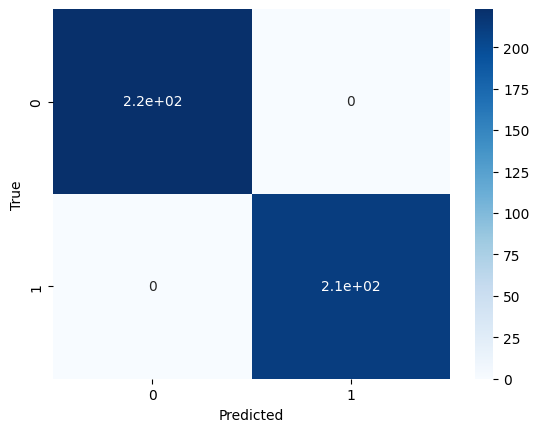

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

lgr = LogisticRegression()
lgr.fit(X_over, y_over)
y_pred = lgr.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy:  0.988479262672811
Confusion Matrix: 
 [[219   4]
 [  1 210]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       223
           1       0.98      1.00      0.99       211

    accuracy                           0.99       434
   macro avg       0.99      0.99      0.99       434
weighted avg       0.99      0.99      0.99       434



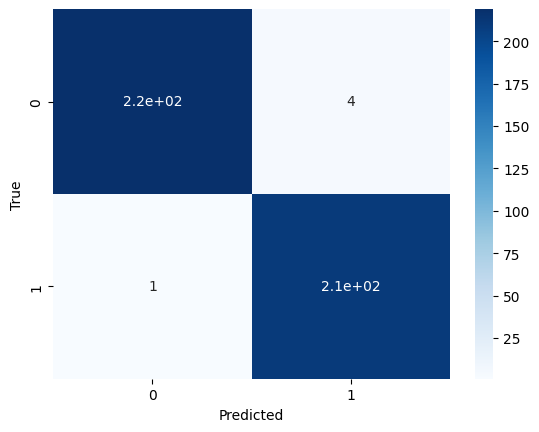

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

dtc = DecisionTreeClassifier()
dtc.fit(X_over, y_over)
y_pred = dtc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy:  0.9907834101382489
Confusion Matrix: 
 [[220   3]
 [  1 210]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       223
           1       0.99      1.00      0.99       211

    accuracy                           0.99       434
   macro avg       0.99      0.99      0.99       434
weighted avg       0.99      0.99      0.99       434



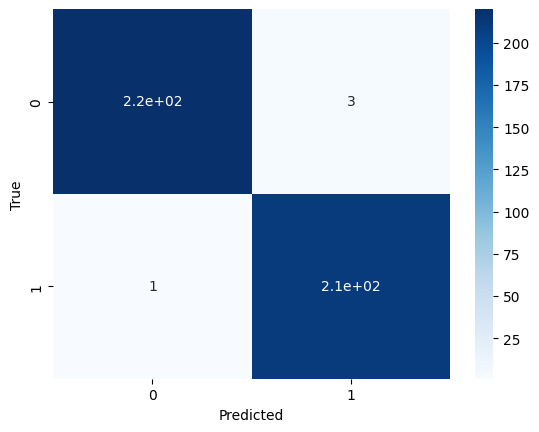

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

abc = AdaBoostClassifier()
abc.fit(X_over, y_over)
y_pred = abc.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from textblob import TextBlob

In [ ]:
#Run sentiment analysis
for rowIndex, row in df.iterrows():
  for columnIndex, value in row.items():
    if type(value) == str:
      polarity = TextBlob(value).sentiment.polarity
      subjectivity = TextBlob(value).sentiment.subjectivity
      df.loc[rowIndex, ["textblob_polarity"]] = polarity
      df.loc[rowIndex, ["textblob_subjectivity"]] = subjectivity

In [ ]:
!pip install pattern &> /dev/null

In [ ]:
import nltk
from pattern.en import sentiment

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#Create empty columns
df["pattern_polarity"] = np.nan
df["pattern_subjectivity"] = np.nan

#Run sentiment analysis
for rowIndex,row in df.iterrows():
  for columnIndex,value in row.items():
    if columnIndex == "Statement":
      scores = sentiment(value)
      polarity = scores[0]
      subjectivity = scores[1]
      df.loc[rowIndex, "pattern_polarity"] = polarity
      df.loc[rowIndex, "pattern_subjectivity"] = subjectivity

In [ ]:
df

,Sentiment,content_tokenize,Statement,textblob_polarity,textblob_subjectivity,pattern_polarity,pattern_subjectivity
0,1,it legal husband rape wife,it legal husband rape wife,0.200000,0.200000,0.200000,0.200000
1,1,dalit lowlif scum,dalit lowlif scum,-0.300000,0.400000,-0.300000,0.400000
2,1,dalit lowliv,dalit lowliv,0.000000,0.000000,0.000000,0.000000
3,1,it better world women dare question men,it better world women dare question men,0.500000,0.500000,0.500000,0.500000
4,1,i work hard immigr take benefit,i work hard immigr take benefit,-0.291667,0.541667,-0.291667,0.541667
...,...,...,...,...,...,...,...
2161,0,in life first organ stone piedra spanish care...,in life first organ stone piedra spanish care...,0.094848,0.388081,0.094848,0.388081
2162,0,there film movi i consid favorit year the gos...,there film movi i consid favorit year the gos...,0.259286,0.475833,0.259286,0.475833
2163,0,1936 prolif year astair roger their second fi...,prolif year astair roger their second film r...,0.162037,0.381944,0.162037,0.381944
2164,0,soylent green one best disturb scienc fiction...,soylent green one best disturb scienc fiction...,0.154566,0.411364,0.154566,0.411364


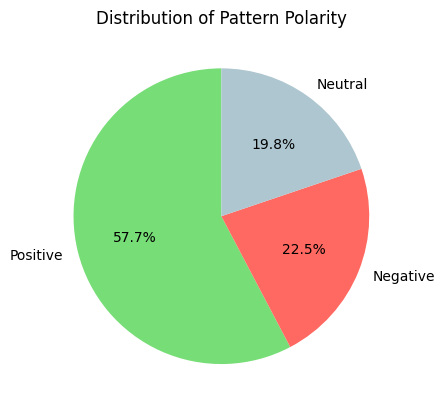

In [ ]:
import matplotlib.pyplot as plt

# Count the number of positive, negative, and neutral values
positive_count = len(df[df['pattern_polarity'] > 0])
negative_count = len(df[df['pattern_polarity'] < 0])
neutral_count = len(df[df['pattern_polarity'] == 0])

# Create a list of counts for each category
counts = [positive_count, negative_count, neutral_count]

# Define the labels for each category
labels = ['Positive', 'Negative', 'Neutral']

# Define the colors for each category
colors = ['#77DD77', '#FF6961', '#AEC6CF']

# Create the pie chart
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Distribution of Pattern Polarity')

# Show the chart
plt.show()

In [ ]:
wrong_positive = df[(df['Sentiment'] == 0) & ((df['pattern_polarity'] < 0))]
num_wrong_positive = len(wrong_positive)
print("Number of Positive/neutral sentiments with negative polarity:", num_wrong_positive)

Number of Positive/neutral sentiments with negative polarity: 120


In [ ]:
wrong_positive

,Sentiment,content_tokenize,Statement,textblob_polarity,textblob_subjectivity,pattern_polarity,pattern_subjectivity
1007,0,some film simpli remad thi one them in bad fi...,some film simpli remad thi one them in bad fi...,-0.002543,0.552165,-0.002543,0.552165
1009,0,after success die hard sequel surpris realli ...,after success die hard sequel surpris realli ...,-0.001087,0.510024,-0.001087,0.510024
1013,0,war movi hollywood genr done redon mani time ...,war movi hollywood genr done redon mani time ...,-0.071314,0.456006,-0.071314,0.456006
1014,0,taut organ grip edward dmytryk crossfir disti...,taut organ grip edward dmytryk crossfir disti...,-0.060794,0.397654,-0.060794,0.397654
1030,0,i thought mukhsin wonder written it entertain...,i thought mukhsin wonder written it entertain...,-0.055595,0.630238,-0.055595,0.630238
...,...,...,...,...,...,...,...
2083,0,a gritti look new york citi dock worker thi c...,a gritti look new york citi dock worker thi c...,-0.108902,0.530303,-0.108902,0.530303
2084,0,i saw movi tonight preview show fantast it we...,i saw movi tonight preview show fantast it we...,-0.002222,0.291111,-0.002222,0.291111
2104,0,thi movi made daiei studio known gamera movi ...,thi movi made daiei studio known gamera movi ...,-0.022427,0.563085,-0.022427,0.563085
2151,0,in new york andi hanson philip seymour hoffma...,in new york andi hanson philip seymour hoffma...,-0.084307,0.549134,-0.084307,0.549134


In [ ]:
wrong_positive = wrong_positive[['Statement', 'Sentiment', 'pattern_polarity']]
wrong_positive.head(10)

,Statement,Sentiment,pattern_polarity
1007,some film simpli remad thi one them in bad fi...,0,-0.002543
1009,after success die hard sequel surpris realli ...,0,-0.001087
1013,war movi hollywood genr done redon mani time ...,0,-0.071314
1014,taut organ grip edward dmytryk crossfir disti...,0,-0.060794
1030,i thought mukhsin wonder written it entertain...,0,-0.055595
1033,the last hard men find jame coburn outlaw lon...,0,-0.016319
1034,thi film took surpris i make habit find littl...,0,-0.033333
1039,daniel daylewi versatil actor aliv english ar...,0,-0.146779
1041,thi short film inspir soontob full length fea...,0,-0.010937
1042,i bought game impuls buy walmart i glad i did...,0,-0.013636


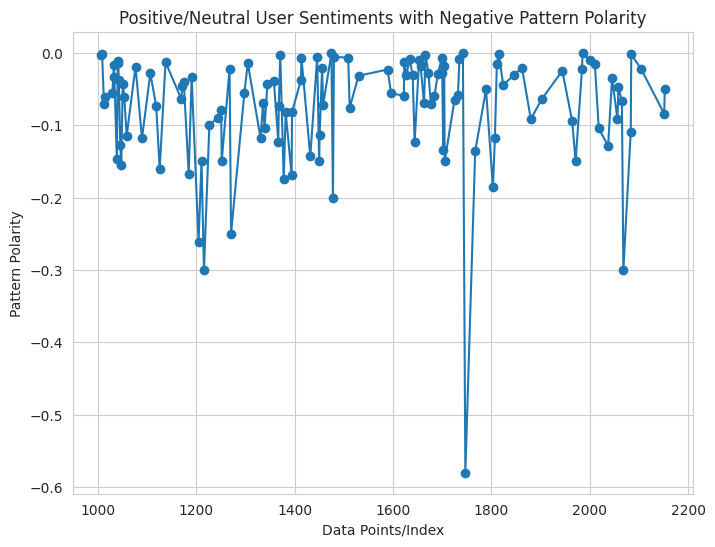

In [ ]:
# Set style
sns.set_style("whitegrid")

# Create line plot
plt.figure(figsize=(8, 6))
plt.plot(wrong_positive['pattern_polarity'], marker='o')

# Add title and labels
plt.title('Positive/Neutral User Sentiments with Negative Pattern Polarity')
plt.xlabel('Data Points/Index')
plt.ylabel('Pattern Polarity')

# Show plot
plt.show()

In [ ]:
wrong_positive_sentiment = df[(df['Sentiment'] == 1) & ((df['pattern_polarity'] > 0))]
num_neutral_negative = len(wrong_positive_sentiment)
print("Number of negative sentiments with neutral polarity:", num_neutral_negative)

Number of negative sentiments with neutral polarity: 213


In [ ]:
wrong_positive_sentiment = wrong_positive_sentiment[['Statement', 'Sentiment', 'pattern_polarity']]
wrong_positive_sentiment.head(10)

,Statement,Sentiment,pattern_polarity
0,it legal husband rape wife,1,0.200000
3,it better world women dare question men,1,0.500000
14,gay peopl burden societi,1,0.416667
15,gay peopl burden societi,1,0.416667
32,short peopl somehow smart,1,0.107143
33,short peopl smart extent,1,0.107143
34,short peopl damn smart,1,0.107143
35,short women fuck cute,1,0.033333
41,blond ladi fuce smart,1,0.214286
42,blond peopl smart,1,0.214286


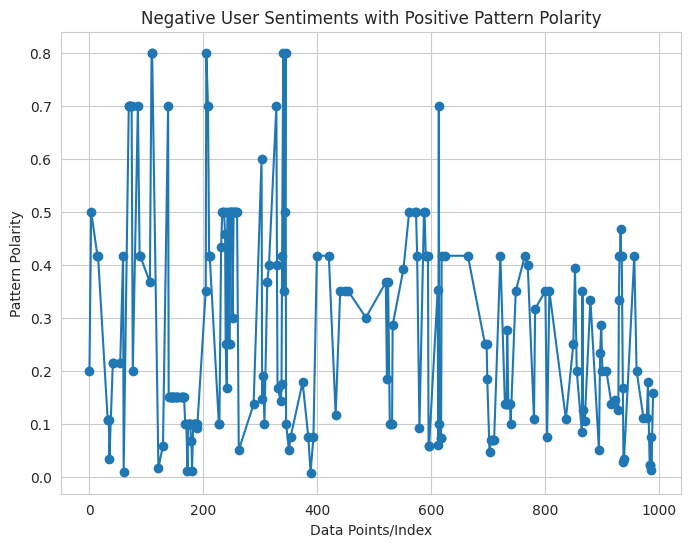

In [ ]:
# Set style
sns.set_style("whitegrid")

# Create line plot
plt.figure(figsize=(8, 6))
plt.plot(wrong_positive_sentiment['pattern_polarity'], marker='o')

# Add title and labels
plt.title('Negative User Sentiments with Positive Pattern Polarity')
plt.xlabel('Data Points/Index')
plt.ylabel('Pattern Polarity')

# Show plot
plt.show()

In [ ]:
wrong_negative_neutral = df[(df['Sentiment'] == 1) & ((df['pattern_polarity'] == 0))]
num_wrong_positive = len(wrong_negative_neutral)
print("Number of Positive/neutral sentiments with negative polarity:", num_wrong_positive)

Number of Positive/neutral sentiments with negative polarity: 419


In [ ]:
wrong_negative_neutral = wrong_negative_neutral[['Statement', 'Sentiment', 'pattern_polarity']]
wrong_negative_neutral.head(10)

,Statement,Sentiment,pattern_polarity
2,dalit lowliv,1,0.0
12,immigr burden societi,1,0.0
13,women burden societi,1,0.0
28,i dont hatefuck islam,1,0.0
31,govern incompet,1,0.0
37,tall men intellig,1,0.0
40,pear tasti,1,0.0
43,arab terrorist,1,0.0
44,terrorist must muslim,1,0.0
45,terrorist must muslim rat,1,0.0


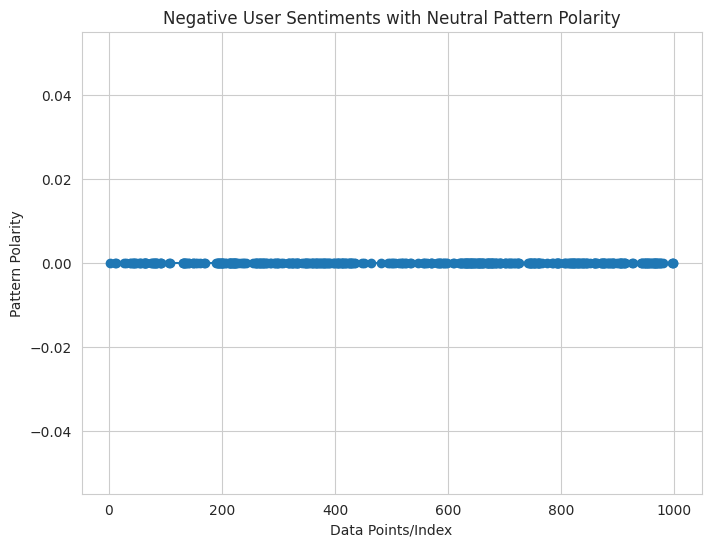

In [ ]:
# Set style
sns.set_style("whitegrid")

# Create line plot
plt.figure(figsize=(8, 6))
plt.plot(wrong_negative_neutral['pattern_polarity'], marker='o')

# Add title and labels
plt.title('Negative User Sentiments with Neutral Pattern Polarity')
plt.xlabel('Data Points/Index')
plt.ylabel('Pattern Polarity')

# Show plot
plt.show()